# PREDICTING RED AND WHITE WINE QUALITY

##### Wine has been around for a really long time, almost about 5,000 BC. Have we ever thought why it's been around for so long. Because of it is easy to make process of simply yeast eating the natural fermentable sugars in grape juice to give its main product alcohol. Any fruit juice with fermentable sugars can make wine but grapes being higher on the fruit evolutionary ladder on fermentable sugar content we choose grapes for making wine.

Wine market is huge in US. Accroding to the statistical atudy, the wine sale for this year is estimated to be 39.8 billion dollars in US and 60 billion dollars around the globe. With these huge cashflowing business, companies are always willing to use technologies to leviate their business to next level and to think about what is next. With the remarkable power of Data Science, Machine Learning and Analytics, the company can make use of their data to stay ahead of their competition. It helps the exective, directors, mangers to understand their business and change statergy, make decision using a data driven approach.

##### INTRODUCTION:Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

In this jupyter notebook we are going to take the Red and wine Quality as the case study for understanding this concept in detail.

###### PROBLEM STATEMENT:
     Wine dataset contains many useful information with different forteen columns.This dataset contains important role in defining taste and quality of wine.I'll analyse the dataset to understand the factors responsible for wine quality.
    First 11 are input variables whereas next 3 are ouptut variables:quality,good and color.
         

###### DESCRIPTION OF ATTRIBUTES:
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile.

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant or sour taste.

3 - citric acid:It is found in small quantities, citric acid can add ‘freshness’ and flavor to wines.

4 - residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/liter are considered sweet.

5 - chlorides: the amount of salt in the wine.

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

12- quality:It tells us the quality of wines rating from 0(very bad) to 10(very good).
    
13- good:It tells us about goodness of the wine.The goodness of the wine is depending upon the quality of it.If quality of wine is below or equal to 6 then goodness is zero(bad) otherwise it is one(good).    

14- color:It tells us about the color of the wine i.e.Red or White.    
    

##### DATASET: 
         The dataset that is used for credit card fraud detection is derived from the following  URL :
             https://drive.google.com/file/d/1pW85WoyJnWyLo8FlNEL4UDtkvoaxFI1Z/view?usp=sharing\

#### DATA UNDERSTANDING AND EXPLORATION

In [ ]:
##import Libraries 
#numpy stands for number python
import numpy as np
import pandas as pd
#matplotlib is used for graphical representation.
import matplotlib.pyplot as plt

In [17]:
#Loading the dataset using pandas library.
df=pd.read_csv(r'C:\Users\DELL\Desktop\ML_PROJECT\winequality.csv')

In [18]:
#It gives us the label of each column.
print(df.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')


In [19]:
#It tells us about any missing value in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
good                    6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [20]:
#It print the first five rows starting from index zero.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [21]:
#It prints the last five rows.
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,white


In [22]:
#It describes the whole dataset.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [23]:
#It tells about density and its count.
df.density.value_counts()

0.997600    69
0.997200    69
0.998000    64
0.992000    64
0.992800    63
0.998600    61
0.996200    59
0.996600    59
0.995600    55
0.996800    55
0.995800    54
0.994800    54
0.993400    54
0.993200    54
0.993000    52
0.998200    51
0.993800    50
0.997400    50
0.997800    49
0.998400    49
0.994400    49
0.995400    48
0.992700    48
0.992400    47
0.995200    46
0.997000    45
0.995500    44
0.996400    43
0.994200    41
0.991800    40
            ..
0.993320     1
0.995890     1
0.998275     1
0.999220     1
0.994170     1
0.997190     1
0.992950     1
0.989820     1
0.989190     1
0.988400     1
0.995730     1
0.995690     1
0.998140     1
0.993290     1
0.995330     1
0.997140     1
0.991370     1
0.991630     1
0.990510     1
1.002410     1
0.989950     1
0.989970     1
0.992050     1
1.001180     1
0.996350     1
0.989920     1
0.998580     1
0.991150     1
0.990770     1
1.000510     1
Name: density, Length: 1101, dtype: int64

In [25]:
# We are finding the values whose density is one.
#Here head(30) means that it will fetch first 30 rows where density=1.
df[df.density ==1].head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
340,12.2,0.340,0.50,2.40,0.066,10.0,21.0,1.0,3.12,1.18,9.2,6,0,red
358,11.9,0.430,0.66,3.10,0.109,10.0,23.0,1.0,3.15,0.85,10.4,7,1,red
367,10.4,0.575,0.61,2.60,0.076,11.0,24.0,1.0,3.16,0.69,9.0,5,0,red
402,12.2,0.480,0.54,2.60,0.085,19.0,64.0,1.0,3.10,0.61,10.5,6,0,red
468,11.4,0.360,0.69,2.10,0.090,6.0,21.0,1.0,3.17,0.62,9.2,6,0,red
507,11.2,0.670,0.55,2.30,0.084,6.0,13.0,1.0,3.17,0.71,9.5,6,0,red
534,10.0,0.480,0.24,2.70,0.102,13.0,32.0,1.0,3.28,0.56,10.0,6,0,red
582,11.7,0.490,0.49,2.20,0.083,5.0,15.0,1.0,3.19,0.43,9.2,5,0,red
599,12.7,0.590,0.45,2.30,0.082,11.0,22.0,1.0,3.00,0.70,9.3,6,0,red
664,12.1,0.400,0.52,2.00,0.092,15.0,54.0,1.0,3.03,0.66,10.2,5,0,red


In [27]:
#It will check any missing value in the dataset.
#Here False means that there is no missing value.
df.isnull().values.any()



False

In [29]:
#It tells me about the quality of the wine.
#Here we can predict that there are 2836 values whixh are rated as 6 ;2138 values which are rated as 5 and so on upto 5 
#which are rated as 9
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [30]:
# It will print the values of fixed acidity in Descending order.
df.sort_values(by='fixed acidity', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0,red
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,1,red
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,0,red
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,0,red
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,0,red


In [32]:
#It will print the maximum values from each column with help of numpy library.
import numpy as np
df.apply(np.max)

fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide         289
total sulfur dioxide        440
density                 1.03898
pH                         4.01
sulphates                     2
alcohol                    14.9
quality                       9
good                          1
color                     white
dtype: object

### MULTIPLE LINEAR REGRESSION

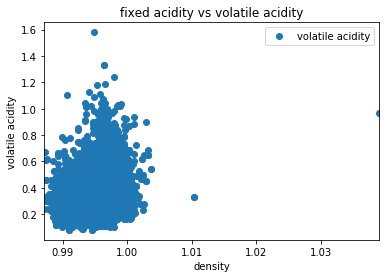

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\DELL\Desktop\ML_PROJECT\winequality.csv')
df.plot(x='density', y='volatile acidity', style='o')
plt.title('fixed acidity vs volatile acidity')
plt.xlabel('density')
plt.ylabel('volatile acidity')
plt.show()

H:\pychamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


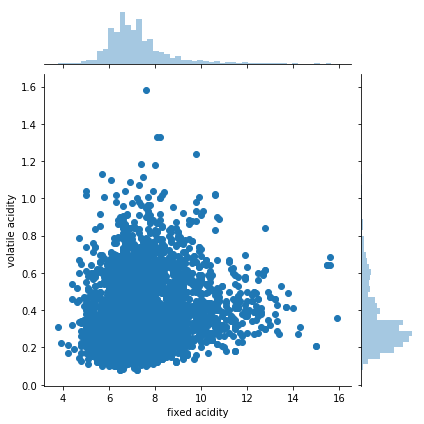

In [6]:
import seaborn as sns
sns.jointplot('fixed acidity', 'volatile acidity', data=df)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

### PREPARING THE DATA-TEST TRAIN

In [17]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality']]
y=df['good']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### PREDICTIONS

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5316,0,0.204877
5210,0,0.240330
3518,0,0.214594
1622,0,-0.018997
2443,1,0.959556
3521,0,-0.147014
5211,0,0.239173
4936,0,0.234935
1161,0,0.282657
5993,0,0.231143


### EVALUATING THE ALGORITHM

In [23]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.22585418311871588
Mean Squared Error:  0.06659210578194599
Root Mean Squared Error:  0.2580544628212153


In [24]:
print(metrics.r2_score(y_test, y_pred))

0.5751435164973941



Not bad, we are getting approx. 57% r-squared with all the variables.


BOX PLOT ANALYSIS:

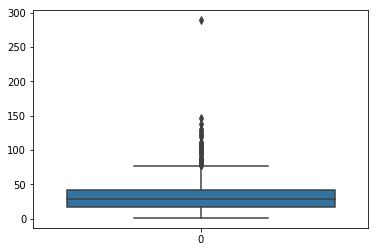

In [35]:
#Univariate Analysis.
#It will give graphical representation for free sulfur dioxide.
#Here we can predict that maximum values are in between 0 to 50.
import seaborn as sns

sns.boxplot(data=df['free sulfur dioxide'])

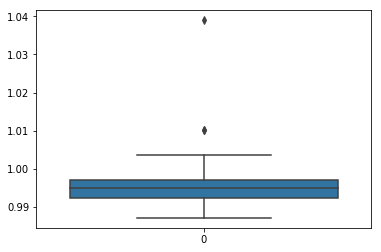

In [13]:
import seaborn as sns

sns.boxplot(data=df['density'])

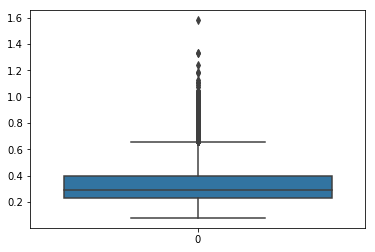

In [14]:
import seaborn as sns

sns.boxplot(data=df['volatile acidity'])

H:\pychamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


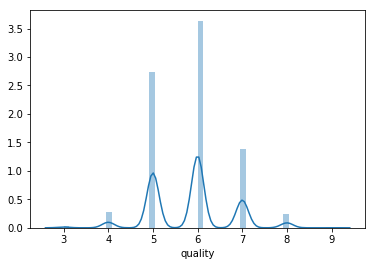

In [38]:
#Plotting a distribution plot.
sns.distplot(df['quality'])

H:\pychamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


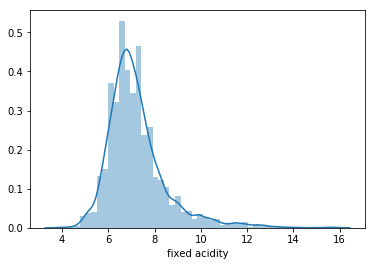

In [15]:
sns.distplot(df['fixed acidity'])

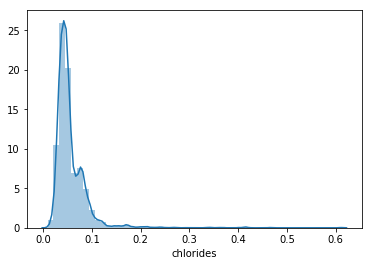

In [16]:
sns.distplot(df['chlorides'])

#### EXPLORATORY DATA ANALYSIS:

In [39]:
df.describe(include=['object', 'bool'])

,color
count,6497
unique,2
top,white
freq,4898


In [41]:
#It will print the color of wine staring with 'w'and head() defines that it will print first five rows.
df[df['color'].apply(lambda color:color[0]=='w')].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,white
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,white
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,white
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,white
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,white


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5668FDAC8>,
      dtype=object)

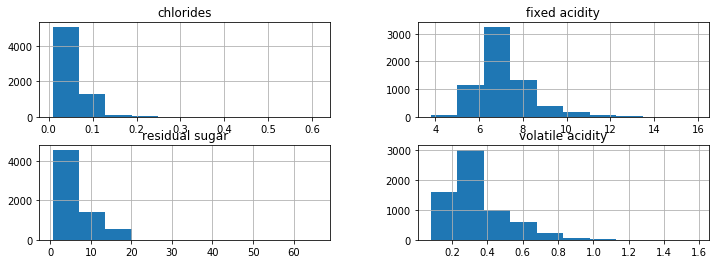

In [50]:
#Creating histogram
df[['fixed acidity', 'chlorides','volatile acidity','residual sugar']].hist(figsize=(12,4))
#Here we can very well observe that fixed acidity and volatile acidity is normally distributed 
#whereas chlorides and residual sugar  are  prominently right skewed.

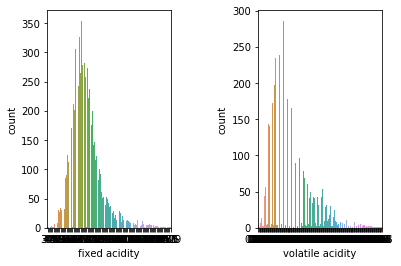

In [52]:
import matplotlib.pyplot as plt
plt.figure(1)

plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(121)
sns.countplot(x='fixed acidity', data=df)

plt.subplot(122)
sns.countplot(x='volatile acidity', data=df)

plt.show()

#### Here we can see both boxplot and histogram .We can also judge that there is not much difference between them.
But  there are many differences between them.Some of them are:
1.Histograms are best suited for looking at the distribution of numerical variables 
      while bar plots are used for categorical features.
2.The values on the X-axis in the histogram are numerical; 
      a bar plot can have any type of values on the X-axis: numbers, strings, booleans.


# Bivariate Analysis

In [55]:
pd.crosstab(df['citric acid'], df['residual sugar'], margins=True)


residual sugar,0.6,0.7,0.8,0.9,0.95,1.0,1.05,1.1,1.15,1.2,...,20.4,20.7,20.8,22.0,22.6,23.5,26.05,31.6,65.8,All
citric acid,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,3,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,151
0.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
0.02,0,0,1,2,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,56
0.03,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,32
0.04,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,41
0.05,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
0.06,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
0.07,0,0,0,0,0,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,34
0.08,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,37


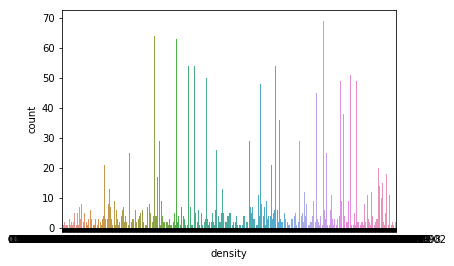

In [58]:
sns.countplot(x='density', data=df)

### DATA EXPLOARTION

In [5]:
#It will print all float and int variables in the dataset.
import pandas as pd
df=pd.read_csv(r'C:\Users\DELL\Desktop\ML_PROJECT\winequality.csv')
df_numeric = df.select_dtypes(include=['float64', 'int'])
df_numeric.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
#It will drop the fixed acidity and volatile acidity columns.
#You can drop as many columns as you want.
df_numeric = df_numeric.drop(['fixed acidity', 'volatile acidity'], axis=1)
df_numeric.head()

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<Figure size 1440x720 with 0 Axes>

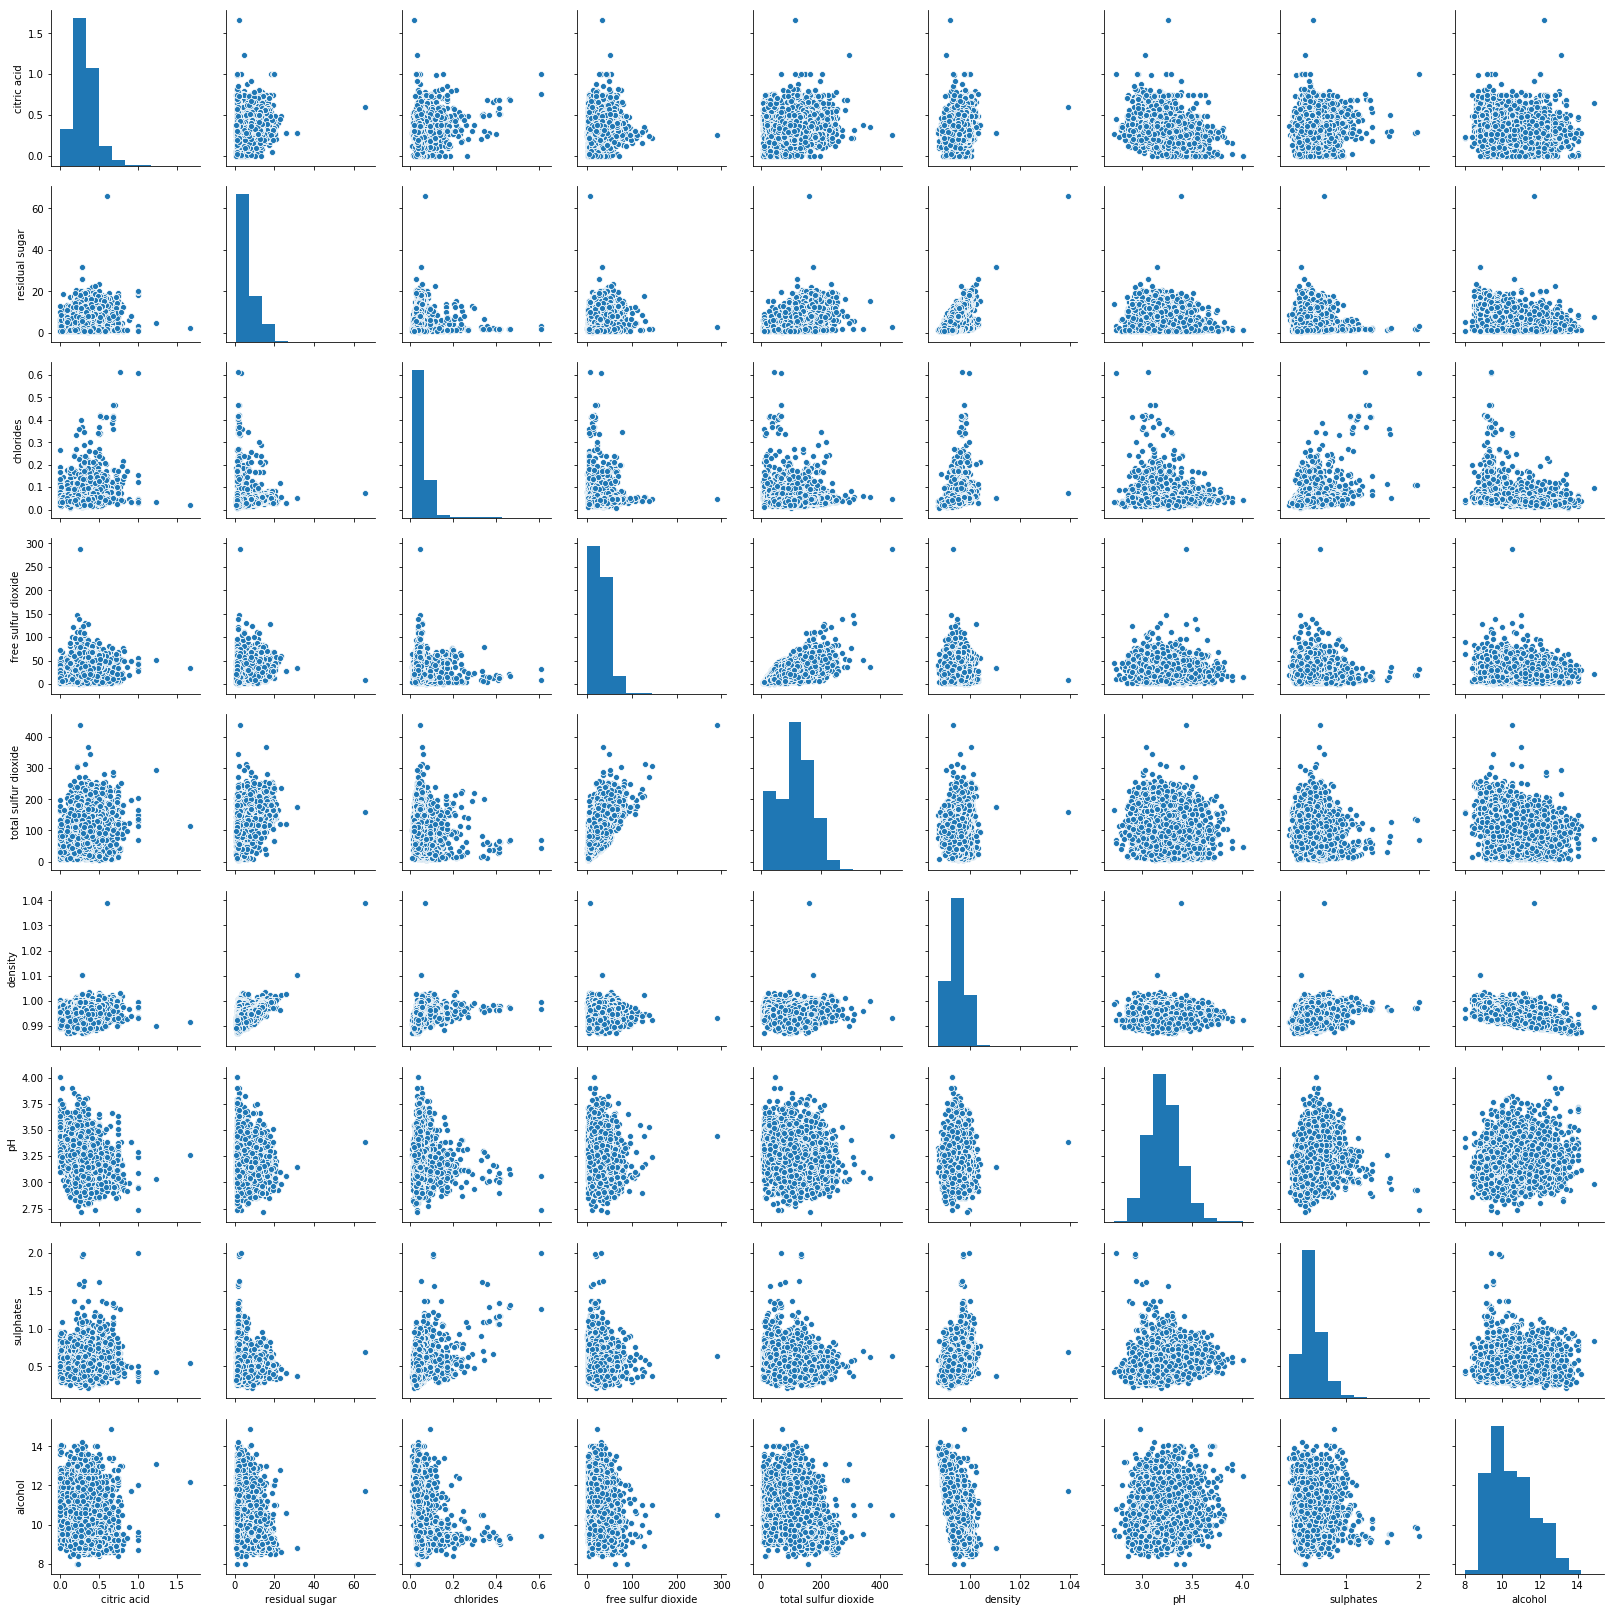

In [9]:
#Pairwise scatter plot to observe linear relationship.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.pairplot(df_numeric)
plt.show()

In [11]:
#It will displat correlation matrix
corr = df_numeric.corr()
corr

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
citric acid,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029
alcohol,-0.010493,-0.359415,-0.256916,-0.179838,-0.265740,-0.686745,0.121248,-0.003029,1.000000


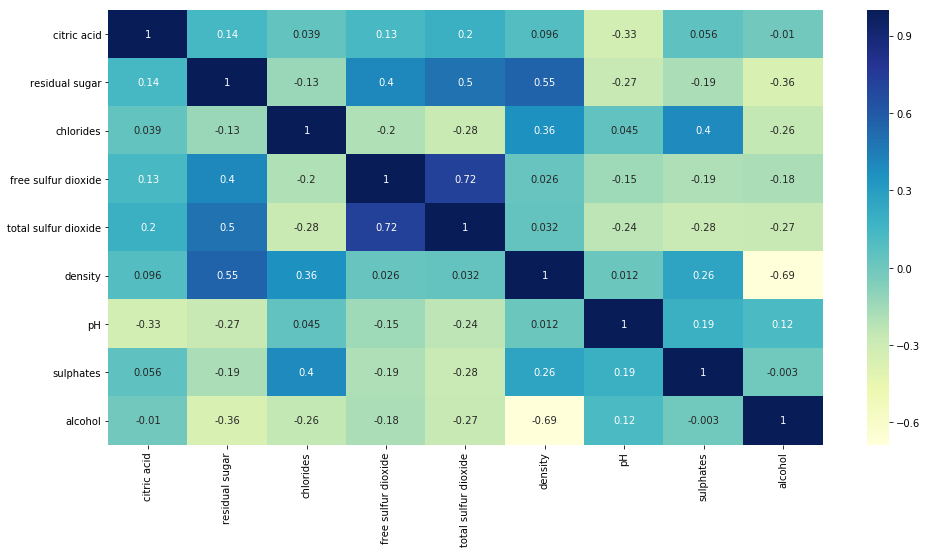

In [12]:
#Here we are plotting correlations on a heatmap.
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [18]:
# converting symboling to categorical
df['chlorides'] = df['chlorides'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null object
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
good                    6497 non-null int64
color                   6497 non-null object
dtypes: float64(10), int64(2), object(2)
memory usage: 710.7+ KB


In [19]:
# quality: first few entries
df['quality'][:30]

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
20    6
21    5
22    5
23    5
24    6
25    5
26    5
27    5
28    5
29    6
Name: quality, dtype: int64

### APPLICATIONS:
    Results can be used by wine manufacturer to improve the quality of wine in future.
    Results can be used by costumer to select best wine.